## Домашнее задание

### 1. Загрузите тренировочные и тестовые датасеты

In [11]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.ensemble import BalancedRandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
Xtrain = pd.read_csv("TrainData.csv")
Xtest = pd.read_csv("TestData.csv")

In [16]:
# Анализ датасета, на нулевые значения, пропуски и т.д.

def analyze_df(df):
    # Количество строк и столбцов
    rows_count, columns_count = df.shape
    print('Количество столбцов:', columns_count)
    print('Количество строк:', rows_count)

    # Первые 5 строк
    display(df.head(5))

    # Статистическое описание
    display(df.describe())

    # Информация о данных
    df.info()

    # Типы данных
    print("\nТипы данных:")
    print(df.dtypes)

    # Обнаружение дубликатов
    duplicates_count = df.duplicated().sum()
    print('\nКоличество дубликатов:', duplicates_count)

    # Обнаружение пропущенных значений
    missing_values = df.isnull().sum()
    print('\nПропущенные значения (по столбцам):')
    print(missing_values)

    # Общее пропущенных значений
    total_missing = missing_values.sum()
    print('\nОбщее количество пропущенных значений:', total_missing)

    # Уникальные значения
    print('\nУникальные значения (по столбцам):')
    print(df.nunique())

    # Гистограммы для числовых признаков
    if not df.select_dtypes(include=[float, int]).empty:
        df.select_dtypes(include=[float, int]).hist(bins=15, figsize=(15, 10))
        plt.suptitle('Гистограммы числовых признаков')
        plt.show()
    else:
        print("\nНет числовых данных для построения гистограмм.")

    # Матрица корреляции
    numeric_df = df.select_dtypes(include=[float, int])
    if not numeric_df.empty:
        correlation_matrix = numeric_df.corr()
        plt.figure(figsize=(10, 8))
        sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
        plt.title('Матрица корреляции числовых признаков')
        plt.show()
    else:
        print("\nНет числовых данных для построения матрицы корреляции.")

Обучающая выборка:
Количество столбцов: 15
Количество строк: 7500


,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,target
0,50,218.593930,273536,0.104575,4,0.445026,0.274531,0.444334,5.970149,0.300298,0.0,0,49,0.100000,0
1,32,276.771005,173314,0.224684,11,0.445026,0.439103,0.444334,5.970149,0.300298,0.0,0,60,0.244418,0
2,38,218.593930,28887,0.032491,7,0.445026,0.274531,0.444334,25.606721,0.300298,0.0,0,50,0.244418,0
3,19,218.593930,427862,0.179322,10,0.049127,0.044987,0.009499,25.606721,0.300298,0.0,0,35,0.244418,0
4,44,218.593930,109339,0.032491,7,0.098837,0.115721,0.066581,5.970149,0.113590,0.0,0,46,0.185185,0


,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,target
count,7500.000000,7425.000000,7.500000e+03,7500.000000,7500.000000,7500.000000,5625.000000,7500.000000,7500.000000,7500.000000,7490.000000,7500.000000,7500.000000,7500.000000,7500.000000
mean,38.579600,238.905308,1.903850e+05,0.238933,10.083200,0.238934,0.240556,0.238933,23.893333,0.238933,1068.693992,88.974933,40.670800,0.238955,0.238933
std,13.647719,76.198282,1.058674e+05,0.151738,2.546071,0.190283,0.147371,0.193365,4.451530,0.087708,7430.344770,404.517032,12.330051,0.041685,0.426460
min,17.000000,64.259070,1.930200e+04,0.000029,1.000000,0.049127,0.000000,0.009499,5.970149,0.113590,0.000000,0.000000,1.000000,0.000080,0.000000
25%,28.000000,218.593930,1.180190e+05,0.171817,9.000000,0.049127,0.115721,0.066581,25.606721,0.113590,0.000000,0.000000,40.000000,0.244418,0.000000
50%,37.000000,218.593930,1.795685e+05,0.179322,10.000000,0.098837,0.241573,0.103024,25.606721,0.300298,0.000000,0.000000,40.000000,0.244418,0.000000
75%,47.000000,218.593930,2.394418e+05,0.239316,12.000000,0.445026,0.439103,0.444334,25.606721,0.300298,0.000000,0.000000,45.000000,0.244418,0.000000
max,90.000000,575.396825,1.226583e+06,0.729323,16.000000,0.445026,0.482222,0.484375,25.606721,0.300298,99999.000000,4356.000000,99.000000,0.466666,1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      7500 non-null   int64  
 1   f2      7425 non-null   float64
 2   f3      7500 non-null   int64  
 3   f4      7500 non-null   float64
 4   f5      7500 non-null   int64  
 5   f6      7500 non-null   float64
 6   f7      5625 non-null   float64
 7   f8      7500 non-null   float64
 8   f9      7500 non-null   float64
 9   f10     7500 non-null   float64
 10  f11     7490 non-null   float64
 11  f12     7500 non-null   int64  
 12  f13     7500 non-null   int64  
 13  f14     7500 non-null   float64
 14  target  7500 non-null   int64  
dtypes: float64(9), int64(6)
memory usage: 879.0 KB

Типы данных:
f1          int64
f2        float64
f3          int64
f4        float64
f5          int64
f6        float64
f7        float64
f8        float64
f9        float64
f10       float64
f11       float64


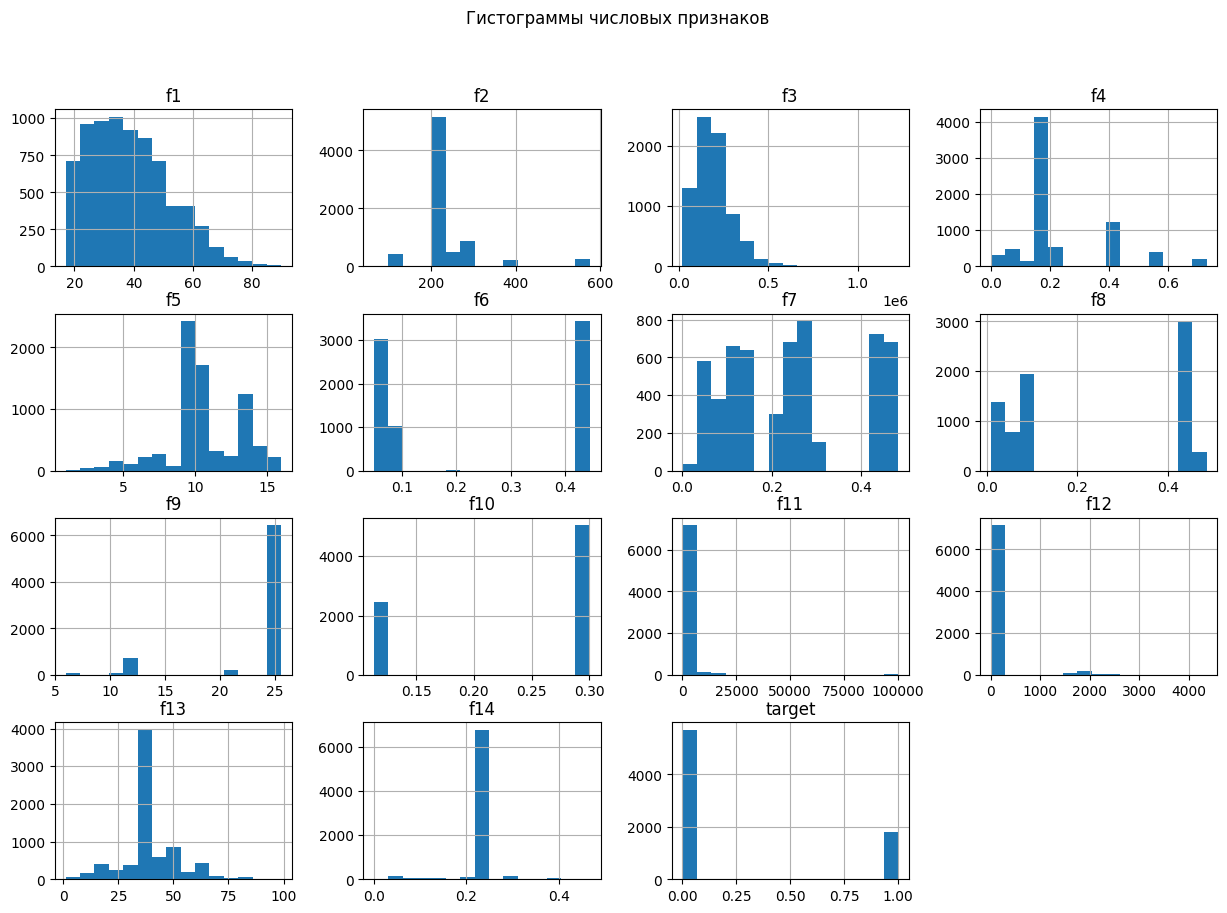

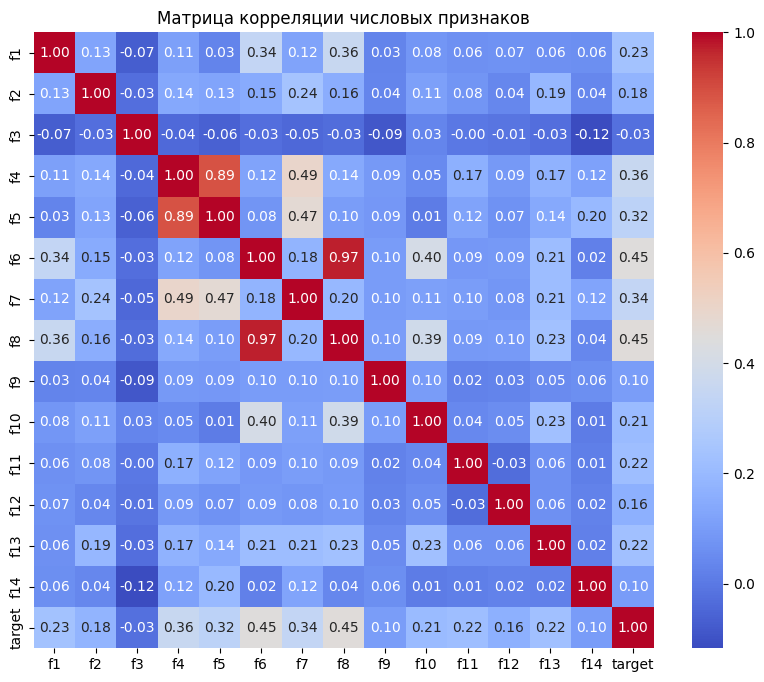

None

 Тестовая выборка:
Количество столбцов: 15
Количество строк: 2500


,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,target
0,31,238.933333,47296,0.238933,10,0.238933,0.238933,0.238933,23.893333,0.238933,0,1740,20,0.238933,0
1,24,238.933333,33088,0.238933,7,0.238933,0.238933,0.238933,23.893333,0.238933,0,0,40,0.238933,0
2,18,238.933333,283342,0.238933,7,0.238933,0.238933,0.238933,23.893333,0.238933,0,0,20,0.238933,0
3,19,238.933333,393712,0.238933,9,0.238933,0.238933,0.238933,23.893333,0.238933,0,0,20,0.238933,0
4,28,238.933333,200515,0.238933,10,0.238933,0.238933,0.238933,23.893333,0.238933,0,0,40,0.238933,0


,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,target
count,2500.000000,2.500000e+03,2500.000000,2.500000e+03,2500.000000,2.500000e+03,2.500000e+03,2.500000e+03,2.500000e+03,2.500000e+03,2500.000000,2500.00000,2500.000000,2.500000e+03,2500.000000
mean,38.069200,2.389333e+02,191561.425200,2.389333e-01,10.056800,2.389333e-01,2.389333e-01,2.389333e-01,2.389333e+01,2.389333e-01,1022.667200,83.76080,40.108800,2.389333e-01,0.234800
std,13.442168,8.528219e-14,107542.508483,5.552226e-17,2.554875,5.552226e-17,5.552226e-17,5.552226e-17,3.553424e-15,5.552226e-17,6786.871929,387.72358,12.109914,5.552226e-17,0.423959
min,17.000000,2.389333e+02,19302.000000,2.389333e-01,1.000000,2.389333e-01,2.389333e-01,2.389333e-01,2.389333e+01,2.389333e-01,0.000000,0.00000,3.000000,2.389333e-01,0.000000
25%,27.000000,2.389333e+02,119098.750000,2.389333e-01,9.000000,2.389333e-01,2.389333e-01,2.389333e-01,2.389333e+01,2.389333e-01,0.000000,0.00000,38.750000,2.389333e-01,0.000000
50%,37.000000,2.389333e+02,177510.500000,2.389333e-01,10.000000,2.389333e-01,2.389333e-01,2.389333e-01,2.389333e+01,2.389333e-01,0.000000,0.00000,40.000000,2.389333e-01,0.000000
75%,47.000000,2.389333e+02,238851.250000,2.389333e-01,12.000000,2.389333e-01,2.389333e-01,2.389333e-01,2.389333e+01,2.389333e-01,0.000000,0.00000,45.000000,2.389333e-01,0.000000
max,90.000000,2.389333e+02,910398.000000,2.389333e-01,16.000000,2.389333e-01,2.389333e-01,2.389333e-01,2.389333e+01,2.389333e-01,99999.000000,2559.00000,99.000000,2.389333e-01,1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      2500 non-null   int64  
 1   f2      2500 non-null   float64
 2   f3      2500 non-null   int64  
 3   f4      2500 non-null   float64
 4   f5      2500 non-null   int64  
 5   f6      2500 non-null   float64
 6   f7      2500 non-null   float64
 7   f8      2500 non-null   float64
 8   f9      2500 non-null   float64
 9   f10     2500 non-null   float64
 10  f11     2500 non-null   int64  
 11  f12     2500 non-null   int64  
 12  f13     2500 non-null   int64  
 13  f14     2500 non-null   float64
 14  target  2500 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 293.1 KB

Типы данных:
f1          int64
f2        float64
f3          int64
f4        float64
f5          int64
f6        float64
f7        float64
f8        float64
f9        float64
f10       float64
f11         int64


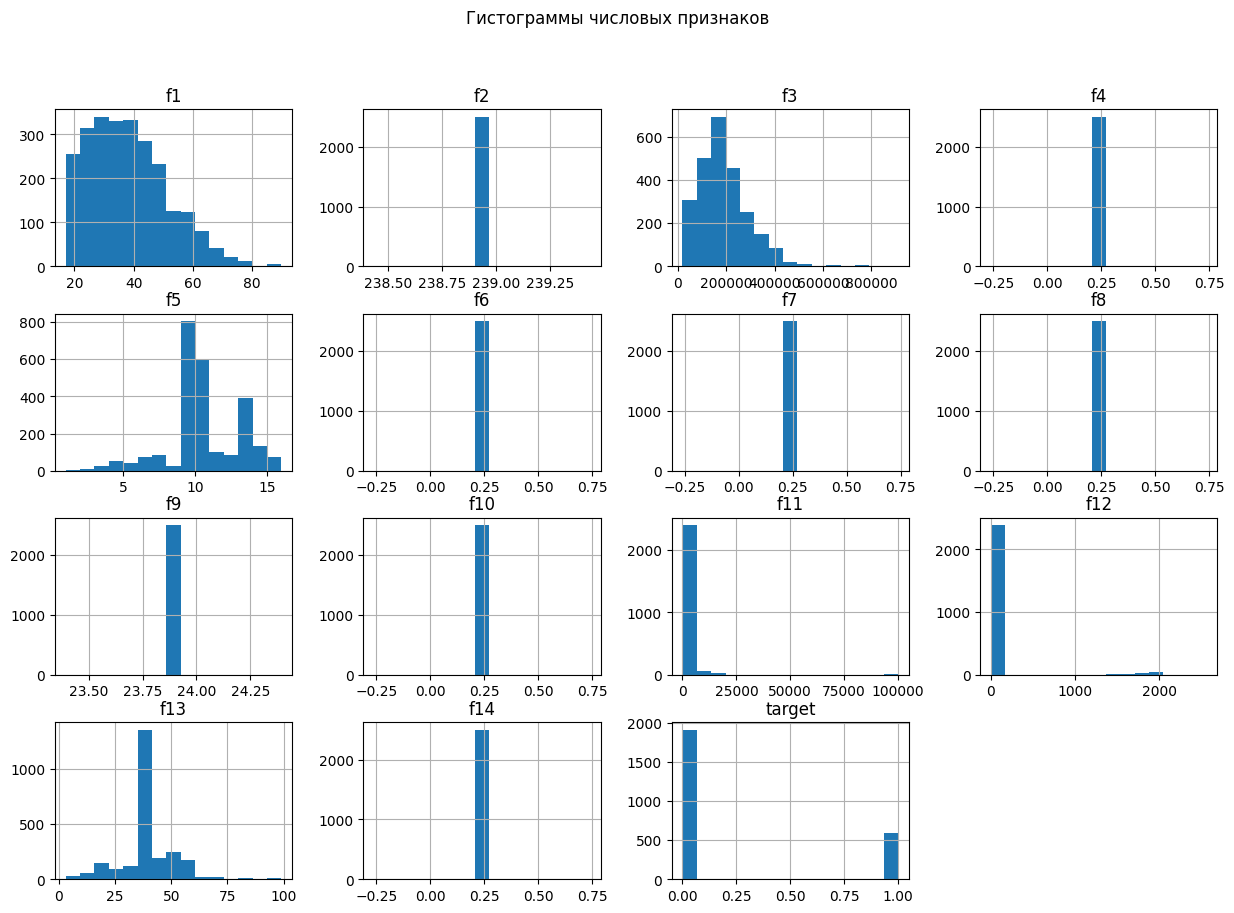

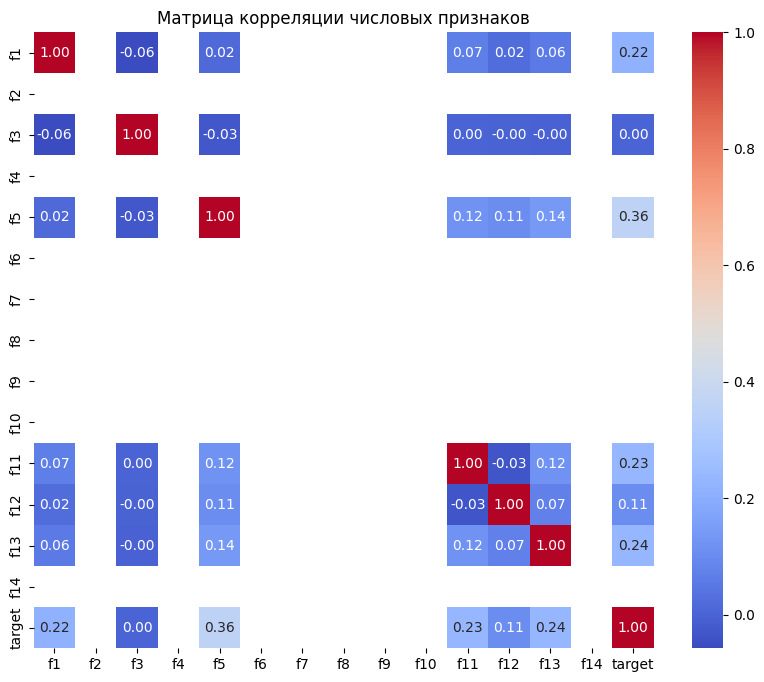

None


In [17]:
# Просмотр первых строк данных
print("Обучающая выборка:")
print(analyze_df(Xtrain))

print("\n Тестовая выборка:")
print(analyze_df(Xtest))

In [26]:
Xtrain.fillna(Xtrain.median(), inplace=True)
Xtest.fillna(Xtest.median(), inplace=True)

Обучающая выборка:
Количество столбцов: 15
Количество строк: 7500


,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,target
0,50,218.593930,273536,0.104575,4,0.445026,0.274531,0.444334,5.970149,0.300298,0.0,0,49,0.100000,0
1,32,276.771005,173314,0.224684,11,0.445026,0.439103,0.444334,5.970149,0.300298,0.0,0,60,0.244418,0
2,38,218.593930,28887,0.032491,7,0.445026,0.274531,0.444334,25.606721,0.300298,0.0,0,50,0.244418,0
3,19,218.593930,427862,0.179322,10,0.049127,0.044987,0.009499,25.606721,0.300298,0.0,0,35,0.244418,0
4,44,218.593930,109339,0.032491,7,0.098837,0.115721,0.066581,5.970149,0.113590,0.0,0,46,0.185185,0


,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,target
count,7500.000000,7500.000000,7.500000e+03,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000
mean,38.579600,238.702194,1.903850e+05,0.238933,10.083200,0.238934,0.240810,0.238933,23.893333,0.238933,1067.269067,88.974933,40.670800,0.238955,0.238933
std,13.647719,75.843216,1.058674e+05,0.151738,2.546071,0.190283,0.127625,0.193365,4.451530,0.087708,7425.491311,404.517032,12.330051,0.041685,0.426460
min,17.000000,64.259070,1.930200e+04,0.000029,1.000000,0.049127,0.000000,0.009499,5.970149,0.113590,0.000000,0.000000,1.000000,0.000080,0.000000
25%,28.000000,218.593930,1.180190e+05,0.171817,9.000000,0.049127,0.131370,0.066581,25.606721,0.113590,0.000000,0.000000,40.000000,0.244418,0.000000
50%,37.000000,218.593930,1.795685e+05,0.179322,10.000000,0.098837,0.241573,0.103024,25.606721,0.300298,0.000000,0.000000,40.000000,0.244418,0.000000
75%,47.000000,218.593930,2.394418e+05,0.239316,12.000000,0.445026,0.274531,0.444334,25.606721,0.300298,0.000000,0.000000,45.000000,0.244418,0.000000
max,90.000000,575.396825,1.226583e+06,0.729323,16.000000,0.445026,0.482222,0.484375,25.606721,0.300298,99999.000000,4356.000000,99.000000,0.466666,1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      7500 non-null   int64  
 1   f2      7500 non-null   float64
 2   f3      7500 non-null   int64  
 3   f4      7500 non-null   float64
 4   f5      7500 non-null   int64  
 5   f6      7500 non-null   float64
 6   f7      7500 non-null   float64
 7   f8      7500 non-null   float64
 8   f9      7500 non-null   float64
 9   f10     7500 non-null   float64
 10  f11     7500 non-null   float64
 11  f12     7500 non-null   int64  
 12  f13     7500 non-null   int64  
 13  f14     7500 non-null   float64
 14  target  7500 non-null   int64  
dtypes: float64(9), int64(6)
memory usage: 879.0 KB

Типы данных:
f1          int64
f2        float64
f3          int64
f4        float64
f5          int64
f6        float64
f7        float64
f8        float64
f9        float64
f10       float64
f11       float64


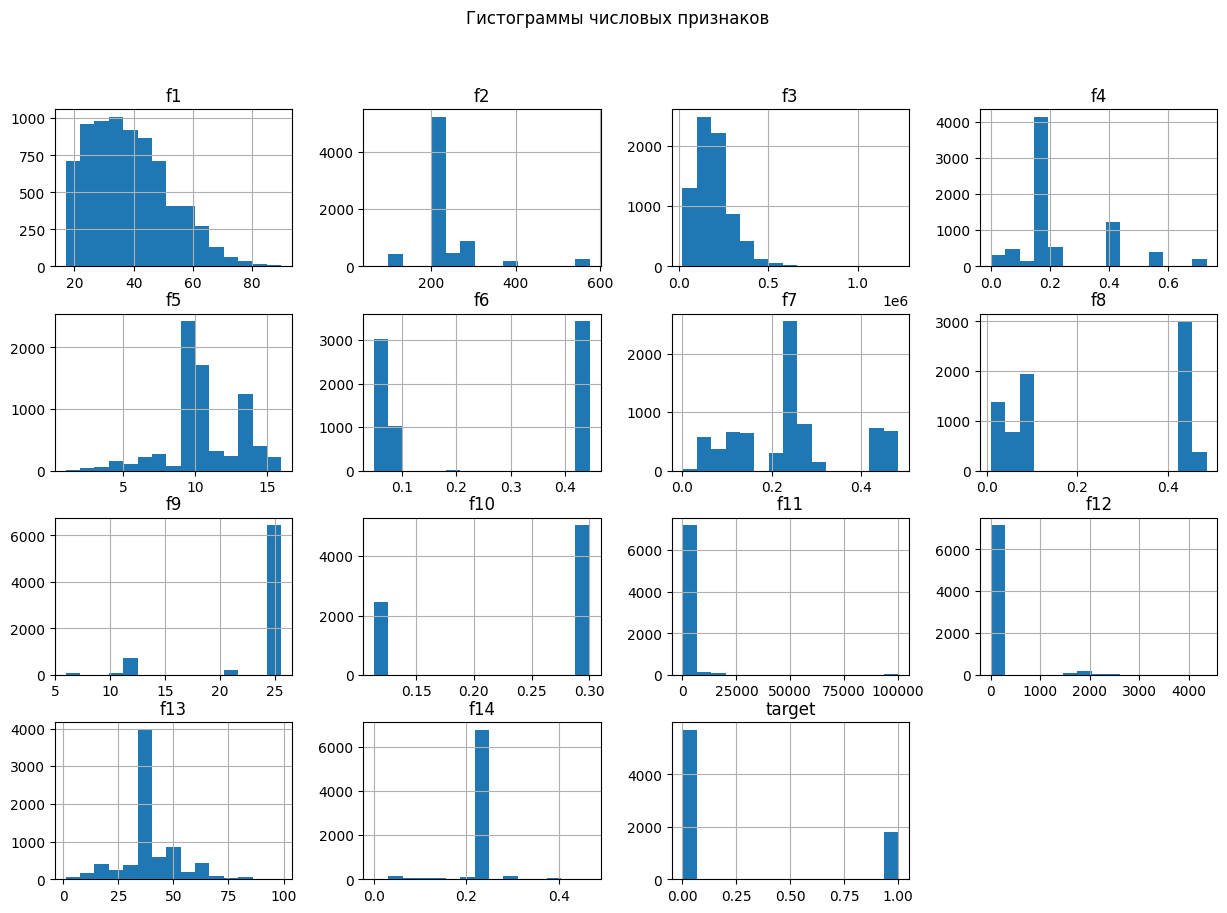

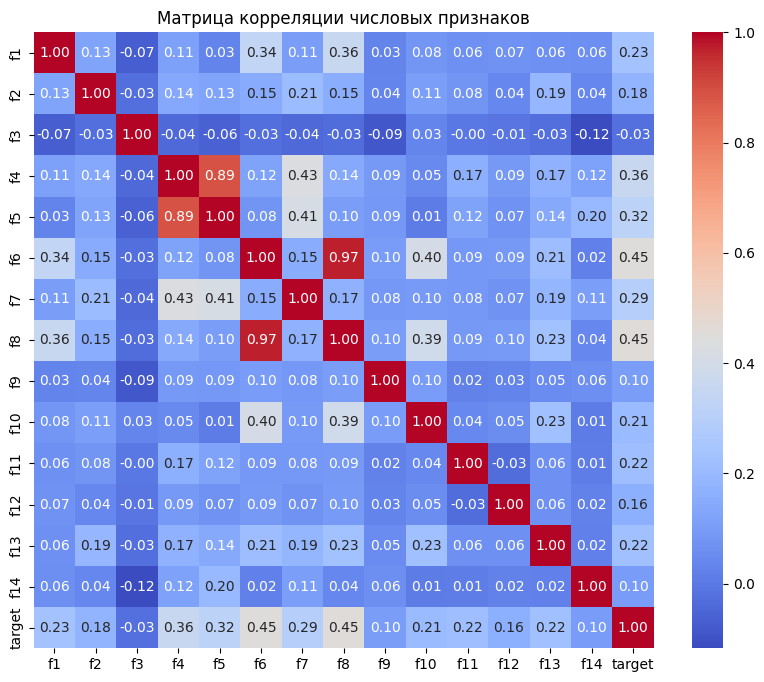

None

 Тестовая выборка:
Количество столбцов: 15
Количество строк: 2500


,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,target
0,31,238.933333,47296,0.238933,10,0.238933,0.238933,0.238933,23.893333,0.238933,0,1740,20,0.238933,0
1,24,238.933333,33088,0.238933,7,0.238933,0.238933,0.238933,23.893333,0.238933,0,0,40,0.238933,0
2,18,238.933333,283342,0.238933,7,0.238933,0.238933,0.238933,23.893333,0.238933,0,0,20,0.238933,0
3,19,238.933333,393712,0.238933,9,0.238933,0.238933,0.238933,23.893333,0.238933,0,0,20,0.238933,0
4,28,238.933333,200515,0.238933,10,0.238933,0.238933,0.238933,23.893333,0.238933,0,0,40,0.238933,0


,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,target
count,2500.000000,2.500000e+03,2500.000000,2.500000e+03,2500.000000,2.500000e+03,2.500000e+03,2.500000e+03,2.500000e+03,2.500000e+03,2500.000000,2500.00000,2500.000000,2.500000e+03,2500.000000
mean,38.069200,2.389333e+02,191561.425200,2.389333e-01,10.056800,2.389333e-01,2.389333e-01,2.389333e-01,2.389333e+01,2.389333e-01,1022.667200,83.76080,40.108800,2.389333e-01,0.234800
std,13.442168,8.528219e-14,107542.508483,5.552226e-17,2.554875,5.552226e-17,5.552226e-17,5.552226e-17,3.553424e-15,5.552226e-17,6786.871929,387.72358,12.109914,5.552226e-17,0.423959
min,17.000000,2.389333e+02,19302.000000,2.389333e-01,1.000000,2.389333e-01,2.389333e-01,2.389333e-01,2.389333e+01,2.389333e-01,0.000000,0.00000,3.000000,2.389333e-01,0.000000
25%,27.000000,2.389333e+02,119098.750000,2.389333e-01,9.000000,2.389333e-01,2.389333e-01,2.389333e-01,2.389333e+01,2.389333e-01,0.000000,0.00000,38.750000,2.389333e-01,0.000000
50%,37.000000,2.389333e+02,177510.500000,2.389333e-01,10.000000,2.389333e-01,2.389333e-01,2.389333e-01,2.389333e+01,2.389333e-01,0.000000,0.00000,40.000000,2.389333e-01,0.000000
75%,47.000000,2.389333e+02,238851.250000,2.389333e-01,12.000000,2.389333e-01,2.389333e-01,2.389333e-01,2.389333e+01,2.389333e-01,0.000000,0.00000,45.000000,2.389333e-01,0.000000
max,90.000000,2.389333e+02,910398.000000,2.389333e-01,16.000000,2.389333e-01,2.389333e-01,2.389333e-01,2.389333e+01,2.389333e-01,99999.000000,2559.00000,99.000000,2.389333e-01,1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      2500 non-null   int64  
 1   f2      2500 non-null   float64
 2   f3      2500 non-null   int64  
 3   f4      2500 non-null   float64
 4   f5      2500 non-null   int64  
 5   f6      2500 non-null   float64
 6   f7      2500 non-null   float64
 7   f8      2500 non-null   float64
 8   f9      2500 non-null   float64
 9   f10     2500 non-null   float64
 10  f11     2500 non-null   int64  
 11  f12     2500 non-null   int64  
 12  f13     2500 non-null   int64  
 13  f14     2500 non-null   float64
 14  target  2500 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 293.1 KB

Типы данных:
f1          int64
f2        float64
f3          int64
f4        float64
f5          int64
f6        float64
f7        float64
f8        float64
f9        float64
f10       float64
f11         int64


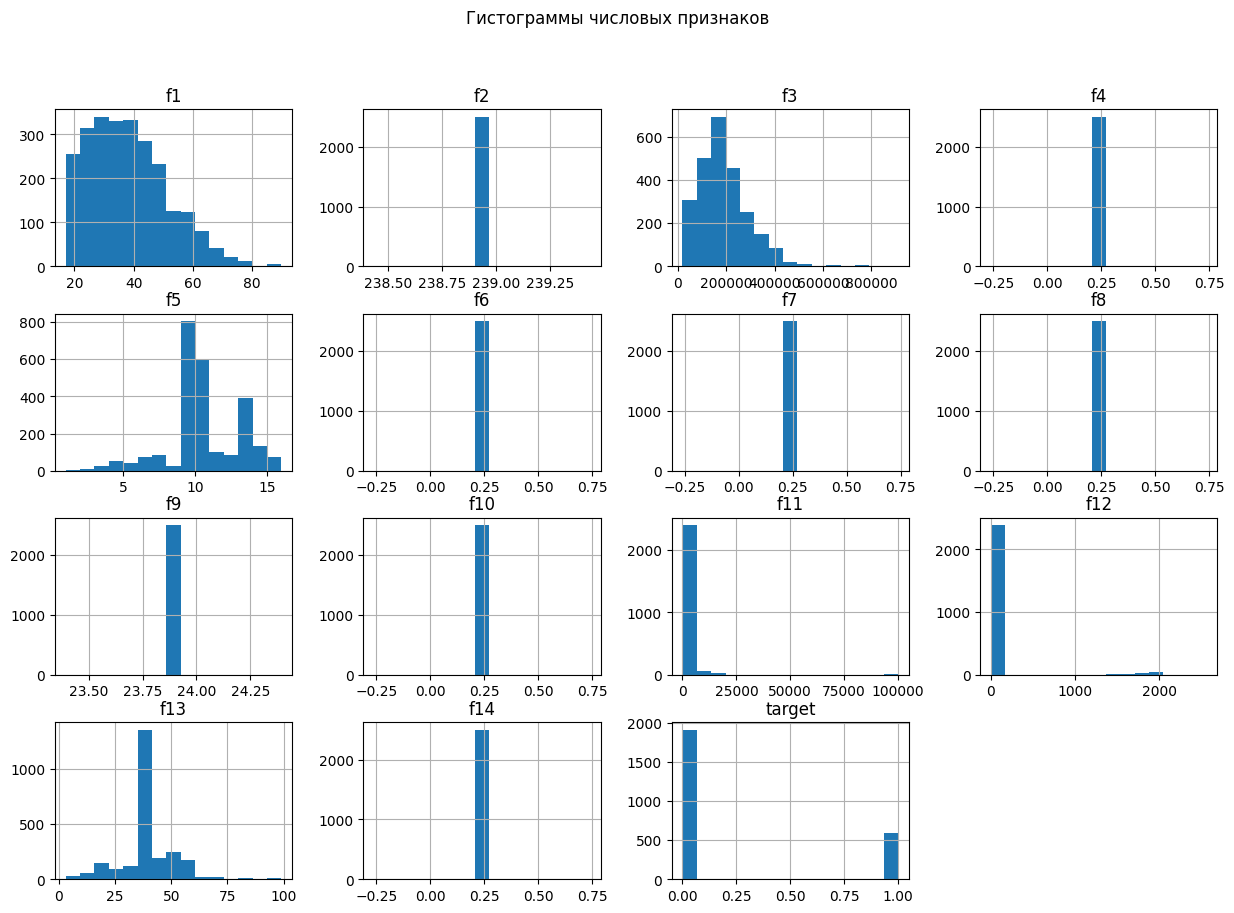

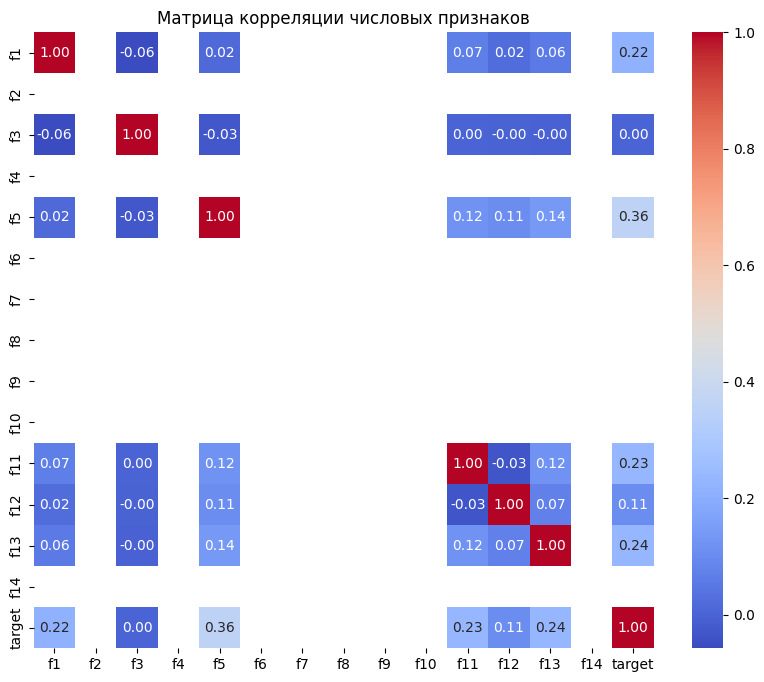

None


In [27]:
# Просмотр первых строк данных
print("Обучающая выборка:")
print(analyze_df(Xtrain))

print("\n Тестовая выборка:")
print(analyze_df(Xtest))

### 2. Оцените баланс классов в задаче
- Затем попытайтесь устно ответить на вопрос, можно ли использовать accuracy как метрику качества в задаче?

Теперь мы оценим баланс классов в целевой переменной:


Распределение классов в обучающей выборке:
0    0.761067
1    0.238933
Name: target, dtype: float64


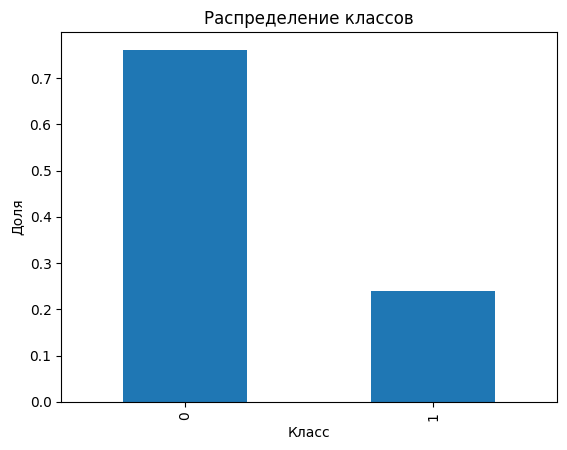

In [28]:
# Оценка баланса классов
class_distribution_train = Xtrain['target'].value_counts(normalize=True)
print("\nРаспределение классов в обучающей выборке:")
print(class_distribution_train)

# Можно также вывести график для наглядности
import matplotlib.pyplot as plt

class_distribution_train.plot(kind='bar', title='Распределение классов')
plt.xlabel('Класс')
plt.ylabel('Доля')
plt.show()


Распределение классов в тестовой выборке:
0    0.7652
1    0.2348
Name: target, dtype: float64


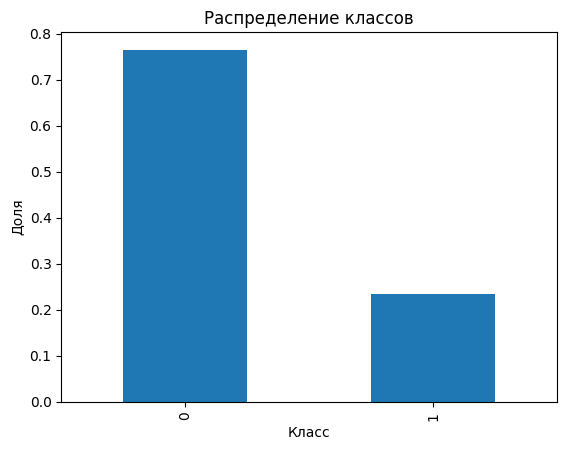

In [29]:
# Оценка баланса классов
class_distribution_test = Xtest['target'].value_counts(normalize=True)
print("\nРаспределение классов в тестовой выборке:")
print(class_distribution_test)

# Можно также вывести график для наглядности
import matplotlib.pyplot as plt

class_distribution_test.plot(kind='bar', title='Распределение классов')
plt.xlabel('Класс')
plt.ylabel('Доля')
plt.show()

**Вопрос о метрике качества**     
Если классы сильно несбалансированы (например, 90% одного класса и 10% другого), то использование точности (accuracy) как метрики качества может быть обманчивым. Высокая точность может быть достигнута за счет предсказания большинства класса, не обращая внимания на качество предсказаний для меньшинства. В таких случаях лучше использовать другие метрики, такие как F1-score, precision, recall или AUC-ROC.

### 3. Постройте baseline-модель:
- разбейте TrainData на тренировочные (Train) и тестовые данные (Test);
- обучите LogisticRegression и SVC с параметрами по умолчанию на тренировочных данных (Train);
- примените модели на тестовых данных (Test).

In [30]:
# Следую определению построим стартовую модель
Xtrain['target'].value_counts()

0    5708
1    1792
Name: target, dtype: int64

In [31]:
Xtest['target'].value_counts()

0    1913
1     587
Name: target, dtype: int64

In [32]:
baseline_train = (1792/7500)*100
baseline_train

23.893333333333334

In [33]:
baseline_test = (587/2500)*100
baseline_test

23.48

In [14]:
# from sklearn.model_selection import train_test_split
# from sklearn.impute import SimpleImputer
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC
# from sklearn.metrics import accuracy_score, classification_report

# # Разделение данных на обучающую (Train) и тестовую (Test) выборки
# X = Xtrain.drop(columns=['target'])
# y = Xtrain['target']

# # Инициализация импьютера (убираем пустые места)
# imputer = SimpleImputer(strategy='mean')  # Можно использовать 'median' или 'most_frequent'
# X_imputed = imputer.fit_transform(X)

# # Разделение данных на обучающую и тестовую выборки
# X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# # Обучение модели Logistic Regression
# logistic_model = LogisticRegression(max_iter=1000)
# logistic_model.fit(X_train, y_train)

# # Предсказание на тестовой выборке
# y_pred_logistic = logistic_model.predict(X_test)

# # Оценка качества модели Logistic Regression
# print("\nРезультаты Logistic Regression:")
# print(f"Accuracy: {accuracy_score(y_test, y_pred_logistic)}")
# print(classification_report(y_test, y_pred_logistic))

# # Обучение модели SVC
# svc_model = SVC()
# svc_model.fit(X_train, y_train)

# # Предсказание на тестовой выборке
# y_pred_svc = svc_model.predict(X_test)

# # Оценка качества модели SVC
# print("\nРезультаты SVC:")
# print(f"Accuracy: {accuracy_score(y_test, y_pred_svc)}")
# print(classification_report(y_test, y_pred_svc))


Результаты Logistic Regression:
Accuracy: 0.806
              precision    recall  f1-score   support

           0       0.81      0.97      0.89      1158
           1       0.73      0.23      0.35       342

    accuracy                           0.81      1500
   macro avg       0.77      0.60      0.62      1500
weighted avg       0.79      0.81      0.76      1500


Результаты SVC:
Accuracy: 0.782
              precision    recall  f1-score   support

           0       0.78      1.00      0.88      1158
           1       0.94      0.05      0.09       342

    accuracy                           0.78      1500
   macro avg       0.86      0.52      0.48      1500
weighted avg       0.82      0.78      0.70      1500



### 4. Улучшите модели
Попробуйте улучшить качество обученных моделей:
- можете задавать class_weights;
- можете изменять параметры модели;
- можете вручную или при помощи методов Python генерировать новые признаки и/или удалять существующие.

Это самая важная и творческая часть задания. Проводите как можно больше экспериментов!

Проведите минимиум три эксперимента: для каждого типа модели минимум один эксперимент.

4.1. Эксперимент с Logistic Regression: Изменение весов классов    
Мы можем задать веса классов, чтобы модель больше фокусировалась на менее представленном классе.

In [34]:
# Разделение данных на обучающие и тестовые
X = Xtrain.drop("target", axis=1) 
y = Xtrain["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
# Создание модели случайного леса с балансировкой весов классов
model = RandomForestClassifier(class_weight='balanced', random_state=42)

# Обучение модели
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [ ]:
# from sklearn.linear_model import LogisticRegression

# # Задание весов классов
# class_weights = {0: 1, 1: 5}  # Пример: увеличиваем вес для класса 1

# logistic_model_weighted = LogisticRegression(max_iter=1000, class_weight=class_weights)
# logistic_model_weighted.fit(X_train, y_train)

# # Предсказание и оценка качества
# y_pred_logistic_weighted = logistic_model_weighted.predict(X_test)
# print("\nРезультаты Logistic Regression с весами классов:")
# print(f"Accuracy: {accuracy_score(y_test, y_pred_logistic_weighted)}")
# print(classification_report(y_test, y_pred_logistic_weighted))


In [37]:
# Предсказание
y_pred = model.predict(X_test)

# Оценка модели
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90      1158
           1       0.68      0.61      0.64       342

    accuracy                           0.85      1500
   macro avg       0.78      0.76      0.77      1500
weighted avg       0.84      0.85      0.84      1500



4.2 Эксперимент с SVC: Настройка гиперпараметров    
Мы можем попробовать различные значения гиперпараметров, такие как C и kernel для модели SVC.

In [ ]:
# from sklearn.svm import SVC
# from sklearn.model_selection import GridSearchCV

# # Определение параметров для Grid Search
# param_grid = {
#     'C': [0.1, 1, 10],
#     'kernel': ['linear', 'rbf'],
#     'class_weight': [None, 'balanced']
# }

# # Создание модели SVC
# svc_model = SVC()

# # Настройка Grid Search
# grid_search = GridSearchCV(svc_model, param_grid, cv=5, scoring='accuracy')
# grid_search.fit(X_train, y_train)

# # Лучшая модель
# best_svc_model = grid_search.best_estimator_
# y_pred_svc_best = best_svc_model.predict(X_test)

# print("\nРезультаты SVC после Grid Search:")
# print(f"Accuracy: {accuracy_score(y_test, y_pred_svc_best)}")
# print(classification_report(y_test, y_pred_svc_best))


In [38]:
# Добавим гипер параметры для модели
model_2 = RandomForestClassifier(class_weight='balanced', random_state=42, n_estimators=100, max_depth=5)

In [39]:
# Обучаем модель
model_2.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=5, random_state=42)

In [40]:
# Предсказание
y_pred = model_2.predict(X_test)

# Оценка модели
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.72      0.82      1158
           1       0.49      0.90      0.63       342

    accuracy                           0.76      1500
   macro avg       0.72      0.81      0.73      1500
weighted avg       0.85      0.76      0.78      1500



4.3 Эксперимент с генерацией новых признаков    
Мы можем создать новые признаки, например, используя полиномиальные признаки или взаимодействия между признаками.

In [ ]:
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.pipeline import make_pipeline

# # Генерация полиномиальных признаков
# poly = PolynomialFeatures(degree=2, include_bias=False)
# X_poly = poly.fit_transform(X_imputed)

# # Разделение новых признаков на обучающую и тестовую выборки
# X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# # Обучение модели Logistic Regression на полиномиальных признаках
# logistic_model_poly = LogisticRegression(max_iter=1000)
# logistic_model_poly.fit(X_train_poly, y_train_poly)

# # Предсказание и оценка качества
# y_pred_logistic_poly = logistic_model_poly.predict(X_test_poly)
# print("\nРезультаты Logistic Regression с полиномиальными признаками:")
# print(f"Accuracy: {accuracy_score(y_test_poly, y_pred_logistic_poly)}")
# print(classification_report(y_test_poly, y_pred_logistic_poly))


In [41]:
# Масштабирование данных
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [42]:
# Балансировка с помощью SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

In [43]:
# Создание нескольких моделей
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
log_reg = LogisticRegression(class_weight='balanced', random_state=42)

In [44]:
# Ансамбль моделей с использованием голосования
voting_clf = VotingClassifier(
    estimators=[('rf', model), ('xgb', xgb), ('log_reg', log_reg)],
    voting='soft'
)

In [45]:
# Обучение ансамблевой модели
voting_clf.fit(X_train_balanced, y_train_balanced)

c:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\xgboost\core.py:158: UserWarning: [11:37:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(class_weight='balanced',
                                                     random_state=42)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric='logloss',
                                            feature_types=None, gamma=None,
                                            gr...
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...)),
                             ('log_reg',
                              LogisticRegression(class_weight='balanced',
                                                 random_state=42))],
                 voting='soft')

In [46]:
# Предсказание
y_pred = voting_clf.predict(X_test)

# Оценка модели
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      1158
           1       0.67      0.67      0.67       342

    accuracy                           0.85      1500
   macro avg       0.78      0.79      0.79      1500
weighted avg       0.85      0.85      0.85      1500



**Анализ**:
- Ансамблевой метод и балансировка помогли улучшить общую производительность.
- Класс `1` еще может нуждаться в дальнейшей настройке, чтобы поднять его точность и полноту чуть выше.
- Однако, результаты уже значительно более сбалансированы, что указывает на общее улучшение модели.